In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Kickstarter_projects_Feb19.csv')

In [3]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192548 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             192548 non-null  int64  
 1   name           192548 non-null  object 
 2   currency       192548 non-null  object 
 3   main_category  192548 non-null  object 
 4   sub_category   192548 non-null  object 
 5   launched_at    192548 non-null  object 
 6   deadline       192548 non-null  object 
 7   duration       192548 non-null  float64
 8   goal_usd       192548 non-null  float64
 9   city           192548 non-null  object 
 10  state          192548 non-null  object 
 11  country        192548 non-null  object 
 12  blurb_length   192548 non-null  int64  
 13  name_length    192548 non-null  int64  
 14  status         192548 non-null  object 
 15  start_month    192548 non-null  int64  
 16  end_month      192548 non-null  int64  
 17  start_Q        192548 non-nul

# Data Cleaning

In [5]:
# first and foremost is to check whether there are any null values
df.isnull().sum()

id               0
name             0
currency         0
main_category    0
sub_category     0
launched_at      0
deadline         0
duration         0
goal_usd         0
city             0
state            0
country          0
blurb_length     0
name_length      0
status           0
start_month      0
end_month        0
start_Q          0
end_Q            0
usd_pledged      0
dtype: int64

In [6]:
# Looks like our dataset has no null values

In [7]:
#next step would be to check if our dataset has any duplicated values

#The first thing to check for duplication would if the ids and campaign names are repeated again and again

In [8]:
dup_id = df['id'].duplicated() == True

In [9]:
dup_id.sum()

24081

In [10]:
#looks like we entries that have duplicated ids,which mean they are repeated

In [11]:
#lets check using campaign names 

In [12]:
dup_names = df['name'].duplicated() == True

In [13]:
dup_names.sum()

24595

In [14]:
#So we also have duplicate entries based of names 

In [15]:
#But while considering both names and ids - id is the considered unique feature for all campaigns whereas names could be same with different id

# So I'll remove the entries with duplicate ids

In [16]:
df.drop_duplicates(subset='id',keep='first',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168467 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             168467 non-null  int64  
 1   name           168467 non-null  object 
 2   currency       168467 non-null  object 
 3   main_category  168467 non-null  object 
 4   sub_category   168467 non-null  object 
 5   launched_at    168467 non-null  object 
 6   deadline       168467 non-null  object 
 7   duration       168467 non-null  float64
 8   goal_usd       168467 non-null  float64
 9   city           168467 non-null  object 
 10  state          168467 non-null  object 
 11  country        168467 non-null  object 
 12  blurb_length   168467 non-null  int64  
 13  name_length    168467 non-null  int64  
 14  status         168467 non-null  object 
 15  start_month    168467 non-null  int64  
 16  end_month      168467 non-null  int64  
 17  start_Q        168467 non-nul

In [18]:
df[df['id'].duplicated() == True] # all the duplicated entries have been removed

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged


In [19]:
df[df['name'].duplicated() == True]

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
9047,1469203004,Animal Crossing Enamel Pins,CAD,fashion,Accessories,2018-11-29 14:59:36,2018-12-29 14:59:36,30.0,302.835756,Tokyo,Tokyo Prefecture,CA,13,4,successful,11,12,Q4,Q4,1197.468105
13820,1044298174,1 in 3,USD,film & video,Shorts,2014-03-06 21:55:15,2014-04-05 20:55:15,30.0,5000.000000,Fairfield,IA,US,23,3,successful,3,4,Q1,Q2,5396.000000
15161,562611749,Blue,USD,film & video,Shorts,2015-09-23 06:52:47,2015-10-23 06:52:47,30.0,5000.000000,Orange,CA,US,27,1,successful,9,10,Q3,Q4,5030.000000
15909,146180209,Monster,GBP,theater,Plays,2017-07-31 16:33:57,2017-08-30 16:33:57,30.0,4516.163995,London,England,GB,26,1,successful,7,8,Q3,Q3,6545.382875
16888,1198524226,Dark Matter,USD,music,Electronic Music,2012-12-05 23:51:40,2013-01-04 23:51:40,30.0,3437.000000,San Francisco,CA,US,17,2,successful,12,1,Q4,Q1,3618.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191561,2114914256,XOX,USD,music,Hip-Hop,2015-01-23 04:24:23,2015-03-24 03:24:23,60.0,5550.000000,Los Angeles,CA,US,21,1,failed,1,3,Q1,Q1,0.000000
191643,550606750,Fallen Angels,USD,film & video,Drama,2014-07-11 19:55:49,2014-08-10 19:55:49,30.0,50000.000000,Bellefonte,PA,US,24,2,failed,7,8,Q3,Q3,10.000000
191649,1255372642,Captive,USD,film & video,Science Fiction,2017-11-25 06:51:59,2017-12-25 06:51:59,30.0,850.000000,Melbourne,FL,US,23,1,failed,11,12,Q4,Q4,5.000000
191725,71964485,Home,USD,art,Installations,2014-10-28 21:54:02,2014-12-07 22:54:02,40.0,1000.000000,Poughkeepsie,NY,US,20,1,failed,10,12,Q4,Q4,0.000000


In [20]:
# We can see that we have 514 records that have duplicate names as of other campaigns

# Lets us confirm that though they have saame name they have different id. 

In [21]:
df[df['name'] == 'Animal Crossing Enamel Pins']

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
168,175057361,Animal Crossing Enamel Pins,USD,fashion,Accessories,2017-07-24 17:10:29,2017-08-21 04:59:00,27.0,400.000000,Springdale,AR,US,22,4,successful,7,8,Q3,Q3,3006.000000
9047,1469203004,Animal Crossing Enamel Pins,CAD,fashion,Accessories,2018-11-29 14:59:36,2018-12-29 14:59:36,30.0,302.835756,Tokyo,Tokyo Prefecture,CA,13,4,successful,11,12,Q4,Q4,1197.468105


In [22]:
df[df['name'] == 'XOX']

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
162454,1417008917,XOX,NZD,art,Installations,2015-09-22 21:48:58,2015-10-22 21:48:58,30.0,171.257392,Auckland,Auckland Region,NZ,26,1,failed,9,10,Q3,Q4,75.295161
191561,2114914256,XOX,USD,music,Hip-Hop,2015-01-23 04:24:23,2015-03-24 03:24:23,60.0,5550.000000,Los Angeles,CA,US,21,1,failed,1,3,Q1,Q1,0.000000


### Thus we have removed the row with duplicate id's. Though we can still see that there are campaigns that have same names. But in that case we can see that they have different Ids, which tells us that the the process of naming the campaigns as reatively unique has been not considered. But as of now we can say that we have unique records and maybe the campaigns with same name have been inspired by the the campaign from which they took the same name.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168467 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             168467 non-null  int64  
 1   name           168467 non-null  object 
 2   currency       168467 non-null  object 
 3   main_category  168467 non-null  object 
 4   sub_category   168467 non-null  object 
 5   launched_at    168467 non-null  object 
 6   deadline       168467 non-null  object 
 7   duration       168467 non-null  float64
 8   goal_usd       168467 non-null  float64
 9   city           168467 non-null  object 
 10  state          168467 non-null  object 
 11  country        168467 non-null  object 
 12  blurb_length   168467 non-null  int64  
 13  name_length    168467 non-null  int64  
 14  status         168467 non-null  object 
 15  start_month    168467 non-null  int64  
 16  end_month      168467 non-null  int64  
 17  start_Q        168467 non-nul

In [24]:
# The now dates that we have are having time info also, we can convert it to just the date and then convert it to datetime format

In [25]:
df["launched_at"]= df["launched_at"].str.split(" ", n = 1, expand = True)
df["deadline"]= df["deadline"].str.split(" ", n = 1, expand = True) 

In [26]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [27]:
# Lets change the format to datetime
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched_at'] = pd.to_datetime(df['launched_at'])

In [28]:
# Another thing here is that we can seperate out the date and extract year and month which will help us in analysis

In [29]:
# Also we can have a seperate column telling us the length of the campaigns in days which will help us in analysis

In [30]:
#df['deadline'] - df['launched_at']
df['campaign span days'] = (df['deadline'] - df['launched_at']).dt.days

In [31]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.00000,Menasha,...,US,14,7,successful,10,11,Q4,Q4,6061.00000,16
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3870.99771,Shepperton,...,GB,24,8,successful,8,9,Q3,Q3,3914.50512,30
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.00000,Manhattan,...,US,21,7,successful,6,7,Q2,Q3,1110.00000,30
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.00000,Nashville,...,US,15,6,successful,9,11,Q3,Q4,4807.00000,46
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.00000,Troy,...,US,15,4,successful,11,1,Q4,Q1,40368.00000,60


In [32]:
df['launched_at'].dt.year

0         2018
1         2018
2         2017
3         2014
4         2016
          ... 
192543    2016
192544    2014
192545    2016
192546    2014
192547    2016
Name: launched_at, Length: 168467, dtype: int64

In [33]:
df['launched year'] = df['launched_at'].dt.year

In [34]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.00000,Menasha,...,14,7,successful,10,11,Q4,Q4,6061.00000,16,2018
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3870.99771,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.50512,30,2018
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.00000,Manhattan,...,21,7,successful,6,7,Q2,Q3,1110.00000,30,2017
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.00000,Nashville,...,15,6,successful,9,11,Q3,Q4,4807.00000,46,2014
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.00000,Troy,...,15,4,successful,11,1,Q4,Q1,40368.00000,60,2016


In [35]:
df['goal_usd'] =  round(df['goal_usd'],2)
df['usd_pledged'] = round(df['usd_pledged'],2)

In [36]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.0,Menasha,...,14,7,successful,10,11,Q4,Q4,6061.00,16,2018
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3871.0,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.51,30,2018
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.0,Manhattan,...,21,7,successful,6,7,Q2,Q3,1110.00,30,2017
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.0,Nashville,...,15,6,successful,9,11,Q3,Q4,4807.00,46,2014
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.0,Troy,...,15,4,successful,11,1,Q4,Q1,40368.00,60,2016


In [37]:
df.shape

(168467, 22)

## Now we kind of have a proper cleaned dataset with no null values and duplicated values and now we can start analysing our data and visualizing those results

In [38]:
main_cat_values = df['main_category'].value_counts()
main_cat_values

music           24479
film & video    23810
art             17883
technology      17817
publishing      16959
food            13278
games           10782
fashion          8867
comics           6299
design           5881
photography      5661
crafts           5443
theater          4653
journalism       3638
dance            3017
Name: main_category, dtype: int64

In [39]:
#Lets see the counts of main category of projects

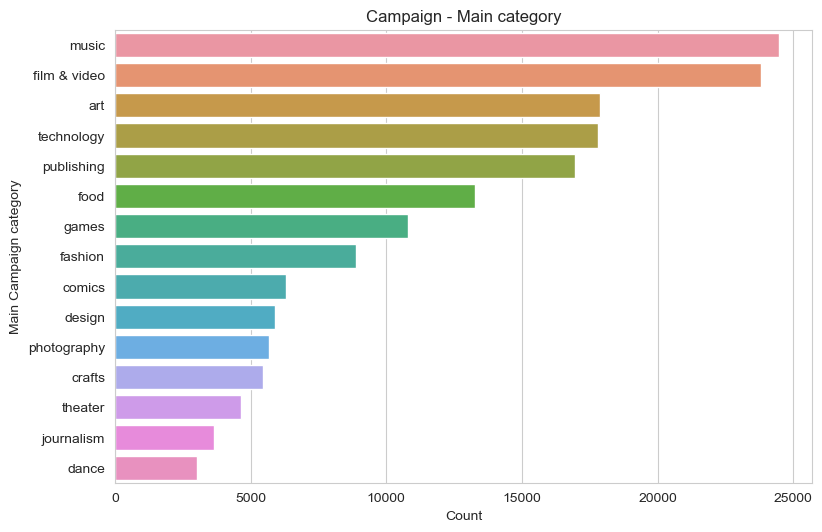

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6),dpi=100)
main_cat_values = df['main_category'].value_counts()

sns.barplot(data=df,x=main_cat_values.values,y=main_cat_values.index)

plt.xlabel('Count')
plt.ylabel('Main Campaign category')
plt.title('Campaign - Main category');

# Music seems to the most popular Kickstarter campaign

In [41]:
#Lets have a look on the sub categories also

In [42]:
sub_cat = df['sub_category'].value_counts()
sub_cat = sub_cat.nlargest(15)

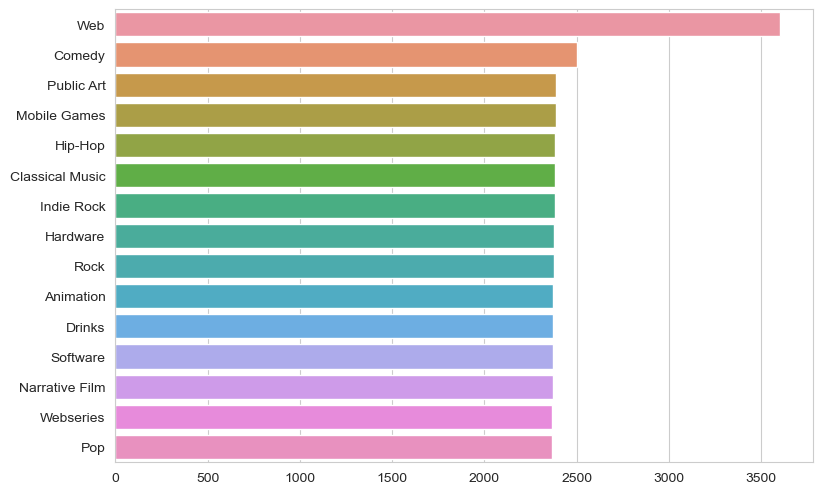

In [43]:
plt.figure(figsize=(9,6),dpi=100)

sns.barplot(x=sub_cat.values,y=sub_cat.index)

In [44]:
df[df['sub_category'] == 'Web']

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
35,1189048754,VendScore,USD,technology,Web,2016-04-01,2016-04-26,25.0,15000.00,Chicago,...,19,1,successful,4,4,Q2,Q2,15185.00,25,2016
48,604732563,For Journalism,USD,journalism,Web,2013-01-26,2013-03-12,45.0,32000.00,Gainesville,...,17,2,successful,1,3,Q1,Q1,34358.97,45,2013
82,1783414895,As Simple As Possible Deep Learning Tensorflow...,CAD,technology,Web,2018-05-02,2018-05-19,17.0,7.57,Abbotsford,...,23,8,successful,5,5,Q2,Q2,71.95,17,2018
104,759942690,"Bellingcat, for and by citizen investigative j...",GBP,journalism,Web,2014-07-14,2014-08-15,32.0,60645.63,London,...,19,7,successful,7,8,Q3,Q3,87132.14,32,2014
245,484547610,www.GenuineU.com - Mental Health Support for S...,USD,technology,Web,2018-12-18,2019-01-17,30.0,2500.00,Kansas City,...,20,7,successful,12,1,Q4,Q1,5075.00,30,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192353,16477961,Massage Therapy Near Me,USD,technology,Web,2015-07-01,2015-07-31,30.0,5000.00,Richmond,...,24,4,failed,7,7,Q3,Q3,0.00,30,2015
192366,283061845,"Unity, A Content Creators Toolkit",GBP,technology,Web,2016-09-19,2016-10-19,30.0,14425.92,Stroud,...,20,5,failed,9,10,Q3,Q4,104.02,30,2016
192375,1378843837,The Palm Machine,CAD,technology,Web,2016-04-14,2016-05-15,31.0,29526.49,Vancouver,...,15,3,failed,4,5,Q2,Q2,948.56,31,2016
192380,1045327566,building a innovative coworking,EUR,technology,Web,2017-11-25,2017-12-25,30.0,34010.64,Turin,...,18,4,failed,11,12,Q4,Q4,0.00,30,2017


#### Web sub category form technology turn out to be the one with most no kicstarter campaign with 3600 campaigns

In [45]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.0,Menasha,...,14,7,successful,10,11,Q4,Q4,6061.00,16,2018
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3871.0,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.51,30,2018
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.0,Manhattan,...,21,7,successful,6,7,Q2,Q3,1110.00,30,2017
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.0,Nashville,...,15,6,successful,9,11,Q3,Q4,4807.00,46,2014
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.0,Troy,...,15,4,successful,11,1,Q4,Q1,40368.00,60,2016


In [202]:
df['launched year'].value_counts()

2015    35280
2018    28482
2016    26524
2017    26111
2014    25845
2013    11247
2012     8556
2011     4156
2010     1220
2019      887
2009      159
Name: launched year, dtype: int64

The country having the most no of kickstarter campaings is US with 122272 campaigns


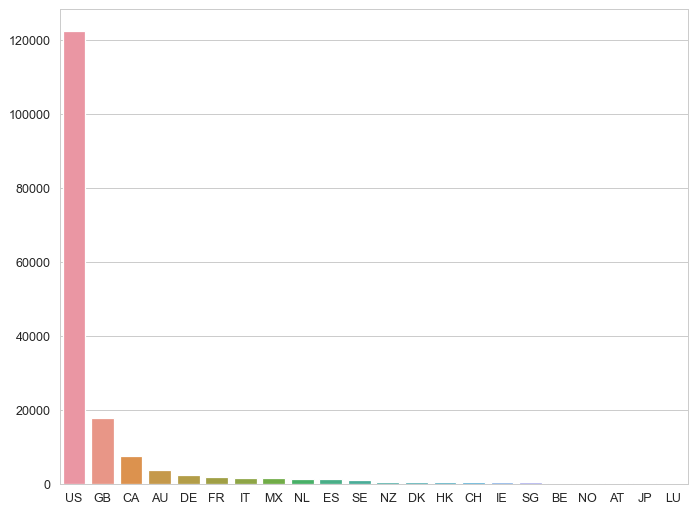

In [46]:
# lets have a look at the country distribution

countries = df['country'].value_counts()
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(y=countries.values,x=countries.index)

print('The country having the most no of kickstarter campaings is',countries.index[0],'with',countries.values[0],'campaigns')

The most used currency for pledging is:- USD


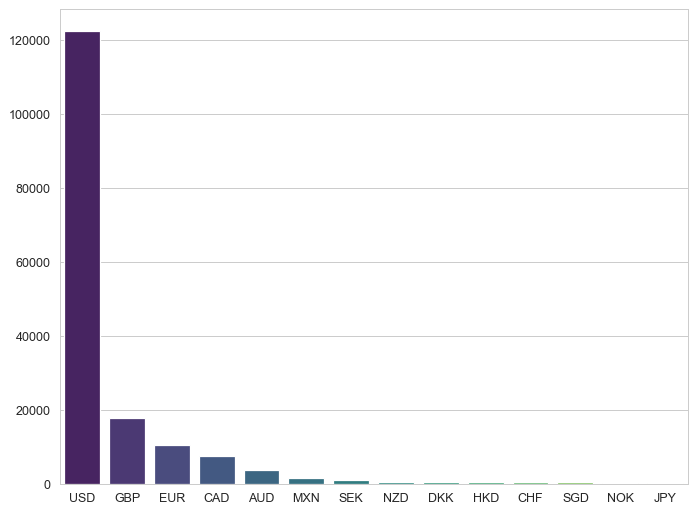

In [47]:
#lets have a look on the currency distribution
curr = df['currency'].value_counts()
plt.figure(figsize=(9,7),dpi=90)
sns.barplot(y=curr.values,x=curr.index,palette='viridis')

print('The most used currency for pledging is:-',curr.index[0])

In [48]:
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.0,Menasha,...,14,7,successful,10,11,Q4,Q4,6061.00,16,2018
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.0,3871.0,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.51,30,2018
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.0,Manhattan,...,21,7,successful,6,7,Q2,Q3,1110.00,30,2017
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.0,3500.0,Nashville,...,15,6,successful,9,11,Q3,Q4,4807.00,46,2014
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.0,30000.0,Troy,...,15,4,successful,11,1,Q4,Q1,40368.00,60,2016


More than half of the projects have succeded in raising the funds for their projects


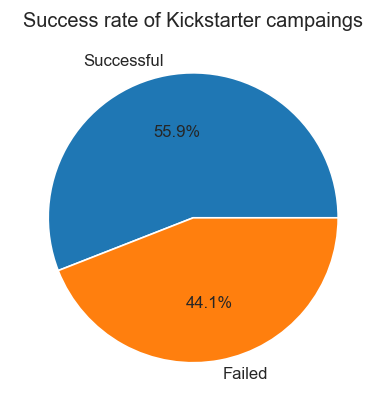

In [49]:
#success rate of campaigns

result=df['status'].value_counts()
fig = plt.figure(dpi=120)
label = 'Successful','Failed'
sizes = result.values

plt.pie(sizes,labels = label,autopct='%1.1f%%');
plt.title('Success rate of Kickstarter campaings')

print('More than half of the projects have succeded in raising the funds for their projects')

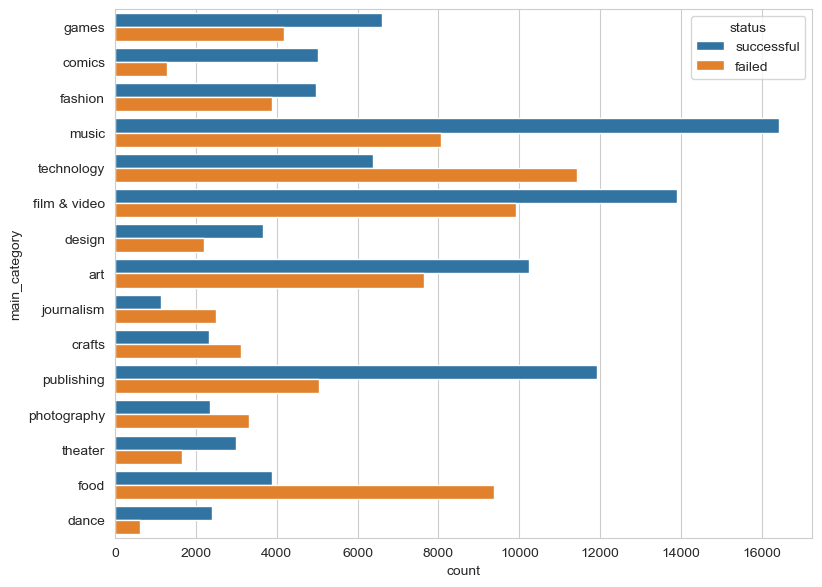

In [50]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data=df,y='main_category',hue='status')

### All over the world music is most successful category and food  & film&video category seems to be most failed. But the above graph cannot be taken into account because more that half of the data belongs to the country US, thus to have a lear view we will have to analyze US data and data of rest of the countries seperately

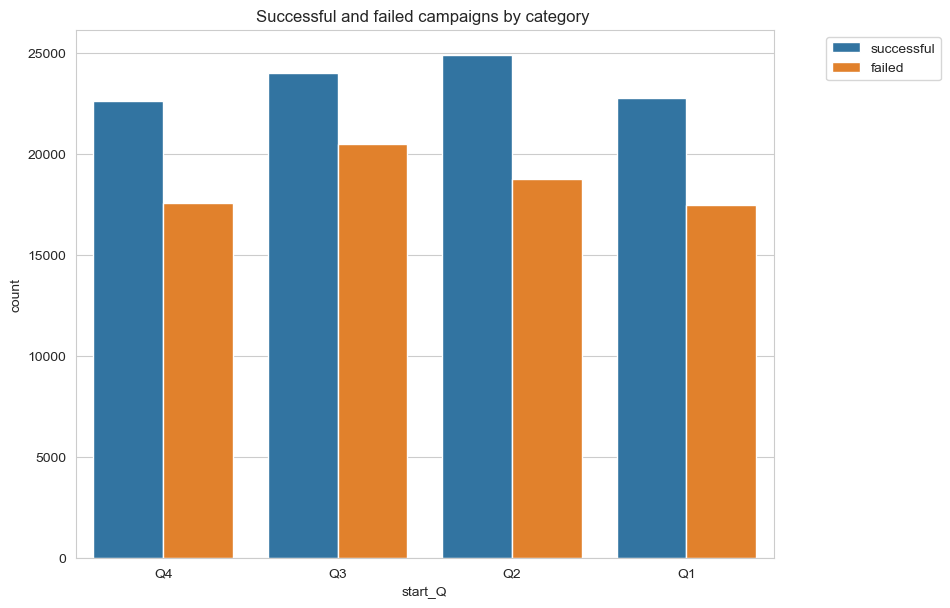

In [51]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = df, x='start_Q',hue='status')

plt.title('Successful and failed campaigns by category ')

plt.legend(bbox_to_anchor=(1.25,1))

### Visualizing by which quarter the campaigns were launched in all quarter the successful campaigns are more the failed ones 

In [52]:
#lets see the top 5 successful main categories which have been successful in raising the goal funding

success_projects = df[df['status'] == 'successful']


In [53]:
success_cat = success_projects.groupby('main_category')['usd_pledged'].sum()
success_cat.to_frame().reset_index().sort_values('usd_pledged', ascending = False).head(30).set_index('main_category')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
success_cat

main_category
art             68424228.280
comics          54150277.320
crafts          13922364.490
dance           12773496.260
design         183816005.960
fashion        103417298.120
film & video   226649677.890
food            75223532.330
games          344791571.250
journalism      13653735.940
music          121444939.120
photography     29987422.160
publishing     113260566.490
technology     592840738.750
theater         19610496.040
Name: usd_pledged, dtype: float64

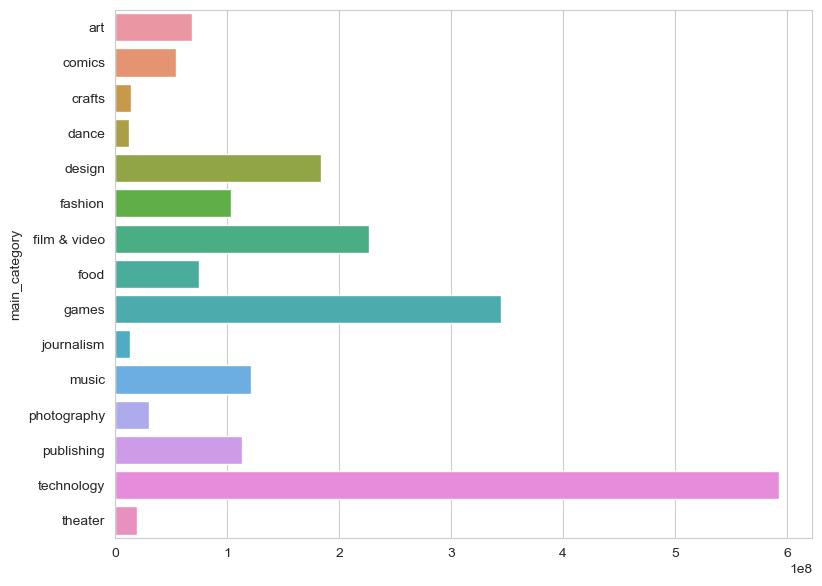

In [54]:
plt.figure(figsize=(9,7),dpi=100)

sns.barplot(y=success_cat.index,x=success_cat.values)

In [200]:
success_projects = df[df['status'] == 'successful']
success_cat = success_projects.groupby('main_category')['usd_pledged'].sum().to_frame().reset_index().sort_values('usd_pledged', ascending = False).head(30).set_index('main_category')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
success_cat

,usd_pledged
main_category,
technology,592840738.750
games,344791571.250
film & video,226649677.890
design,183816005.960
music,121444939.120
publishing,113260566.490
fashion,103417298.120
food,75223532.330
art,68424228.280


In [56]:
sux_cat = success_projects.groupby('main_category').sum()

In [57]:
sux_cat

,id,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged,campaign span days,launched year
main_category,,,,,,,,,,
art,11048437285041,303345.000,40064050.540,189298,59620,64536,68223,68424228.280,304126,20629169
comics,5322361255410,150807.000,25740289.660,97140,29667,32195,35101,54150277.320,151156,10102380
crafts,2497973878939,67133.000,7200196.660,42487,13400,15008,15922,13922364.490,67255,4710271
dance,2562823746330,74179.000,11211164.490,45581,13613,14816,15425,12773496.260,74454,4817482
design,3980207970623,115857.000,40862007.480,64608,24550,24760,25227,183816005.960,116046,7397860
fashion,5283996737222,151466.000,40719841.840,87432,32124,33609,35360,103417298.120,151704,10035483
film & video,14946297370304,430041.000,173909152.770,269437,71313,87639,91511,226649677.890,431151,28012701
food,4170669897004,120495.000,49316189.720,74531,23631,25391,26533,75223532.330,120722,7853987
games,7061191101402,191085.000,113461575.460,120577,38544,43808,46558,344791571.250,191520,13314763


###### Now we know among the category of successfull campaigns which category has most donations

In [58]:
success_projects.columns

Index(['id', 'name', 'currency', 'main_category', 'sub_category',
       'launched_at', 'deadline', 'duration', 'goal_usd', 'city', 'state',
       'country', 'blurb_length', 'name_length', 'status', 'start_month',
       'end_month', 'start_Q', 'end_Q', 'usd_pledged', 'campaign span days',
       'launched year'],
      dtype='object')

# Let's see details about the successful campaigns of US

In USA more than half of the projects have succeded in raising the funds for their projects


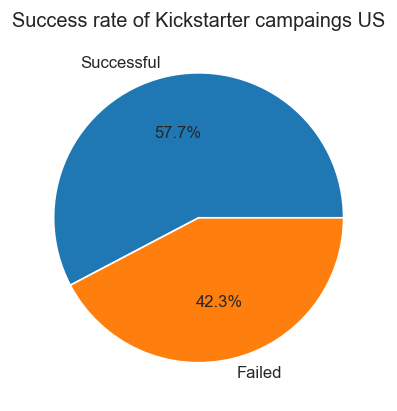

In [59]:
#success rate of campaigns
usa = df[df['country'] == 'US']
result=usa['status'].value_counts()
fig = plt.figure(dpi=120)
label = 'Successful','Failed'
sizes = result.values

plt.pie(sizes,labels = label,autopct='%1.1f%%');
plt.title('Success rate of Kickstarter campaings US')

print('In USA more than half of the projects have succeded in raising the funds for their projects')

In [60]:
us_success_ks = success_projects[success_projects['country'] == 'US']

In [61]:
us_success_ks.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.000,2000.000,Menasha,...,14,7,successful,10,11,Q4,Q4,6061.000,16,2018
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.000,1100.000,Manhattan,...,21,7,successful,6,7,Q2,Q3,1110.000,30,2017
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25,2014-11-10,45.000,3500.000,Nashville,...,15,6,successful,9,11,Q3,Q4,4807.000,46,2014
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28,2017-01-27,60.000,30000.000,Troy,...,15,4,successful,11,1,Q4,Q1,40368.000,60,2016
5,122409435,"Aaron McDonnell EP ""Follow""",USD,music,Country & Folk,2014-01-22,2014-02-21,30.000,7500.000,Seattle,...,11,4,successful,1,2,Q1,Q1,7770.000,30,2014


In [62]:
goal = us_success_ks['goal_usd'].mean()
goal

9815.535399410384

In [63]:
achieved = us_success_ks['usd_pledged'].mean()
achieved

22118.84379142222

In [64]:
22118 / 9815

2.253489556800815

# Thus on an average out of all the successful projects that were based in US the campaigns raised "2.25" times of their goal usd

In [160]:
us_success_ks['launched year'].value_counts()

2018    11381
2015    11338
2014    10919
2016     8809
2017     8646
2013     8069
2012     6605
2011     3277
2010      950
2019      427
2009      133
Name: launched year, dtype: int64

### Most of the successfull projects in US were launched in the 2018 & 2015

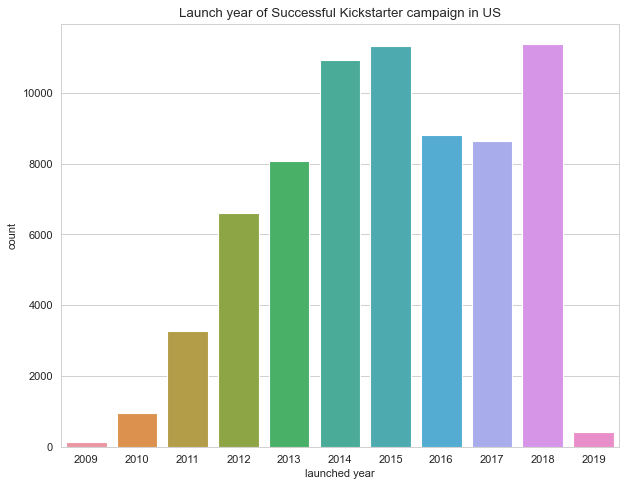

In [194]:
plt.figure(figsize=(9,7),dpi=80)

sns.countplot(data=us_success_ks,x='launched year')

plt.title('Launch year of Successful Kickstarter campaign in US');

In [159]:
us_success_ks['start_Q'].value_counts()

Q2    18746
Q3    18234
Q1    17119
Q4    16455
Name: start_Q, dtype: int64

### The quarter in which the campaigns were launched does not seem to have much impact on the success of the campaigns

In [162]:
us_success_ks['start_month'].value_counts()

10    6745
3     6405
5     6368
7     6223
6     6190
4     6188
11    6038
9     6027
8     5984
2     5407
1     5307
12    3672
Name: start_month, dtype: int64

### Also the start month does not seem to have much impact on the success of the campaigns

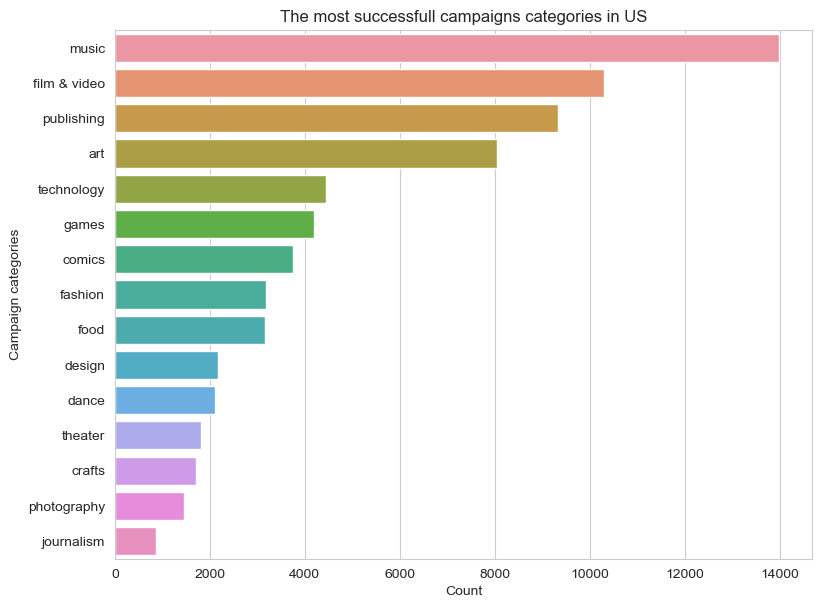

In [166]:
# Most successful category of KS campaigns
plt.figure(figsize=(9,7),dpi=100)
us_s_cat = us_success_ks['main_category'].value_counts()
sns.barplot(x=us_s_cat.values,y=us_s_cat.index)

plt.xlabel('Count')
plt.ylabel('Campaign categories')
plt.title('The most successfull campaigns categories in US');

# Thus in US out of the KS campaigns of music category seems to most successful

In [68]:
us_s_cat.sort_values(ascending=False)

music           13994
film & video    10301
publishing       9340
art              8041
technology       4443
games            4196
comics           3760
fashion          3172
food             3160
design           2178
dance            2110
theater          1816
crafts           1715
photography      1463
journalism        865
Name: main_category, dtype: int64

In [69]:
money_us_pledged = us_success_ks.groupby('main_category').sum()[['goal_usd','usd_pledged'] ]#figs in million dollars
pd.set_option('display.float_format', lambda x: '%.3f' % x)

money_us_pledged

,goal_usd,usd_pledged
main_category,,
art,33282247.740,53597880.350
comics,21165537.000,44669130.010
crafts,5350001.000,10812291.300
dance,10303192.110,11654064.730
design,26952714.000,129140786.690
fashion,27486285.000,73464915.320
film & video,149342584.630,192717819.110
food,41108203.000,62309529.920
games,86251401.000,256257103.160


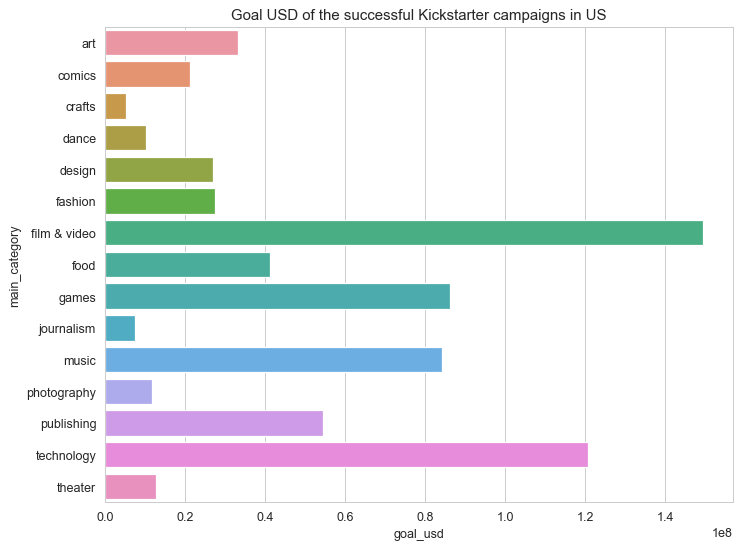

In [156]:
plt.figure(figsize=(9,7),dpi=90)   

sns.barplot(data=money_us_pledged,y=money_us_pledged.index,x='goal_usd')

plt.title('Goal USD of the successful Kickstarter campaigns in US');


Text(0.5, 1.0, 'USD pledged by successful Kickstarter campaigns in US')

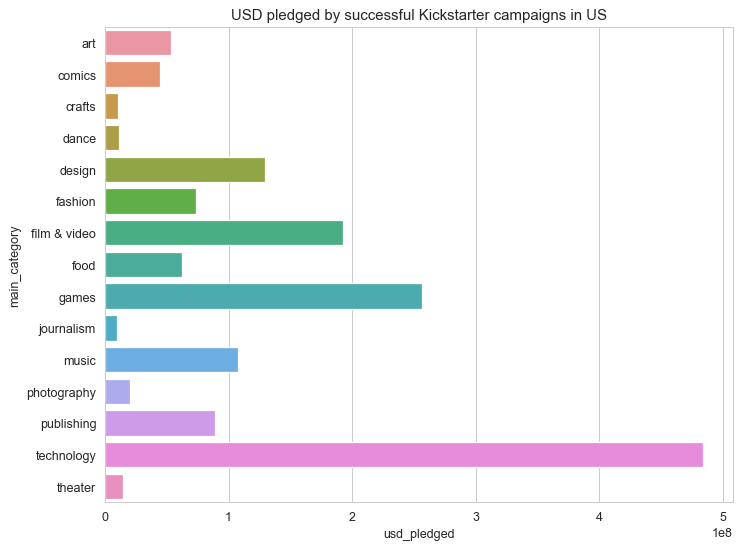

In [157]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(data=money_us_pledged,y=money_us_pledged.index,x='usd_pledged')

plt.title('USD pledged by successful Kickstarter campaigns in US')

## Though music happens to be the main category with most successful campaigns, Technology has racked in more donations so funding wise in US technology is most successful camapigns and music is the most successful category with higher number of successful campaigns.

## But success of any campaign if defined by whether it reached its funding goal so in that manner music remains the top successful category of KS campaigns in US.

## The reason technology being funded more can be because being the most developed country in the world, US has always been the parent of technology driven products, maybe that is why it is funded more

In [72]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
us_success_ks.groupby(['main_category','start_Q']).sum()[['goal_usd','usd_pledged'] ]

goal_usd   usd_pledged
main_category start_Q                           
art           Q1       7150440.810  13388483.060
              Q2      10909567.540  14377758.410
              Q3       8792686.600  15406064.550
              Q4       6429552.790  10425574.330
comics        Q1       4656213.000  10488587.870
              Q2       6336660.000  12990462.750
              Q3       5424965.000  11830539.600
              Q4       4747699.000   9359539.790
crafts        Q1       1305809.000   2534148.540
              Q2       1281871.000   2274133.030
              Q3       1604253.000   3609354.670
              Q4       1158068.000   2394655.060
dance         Q1       2478081.000   2824988.950
              Q2       3008014.110   3389909.400
              Q3       2426603.000   2720050.660
              Q4       2390494.000   2719115.720
design        Q1       6209600.000  25284513.590
              Q2       7800763.000  39280195.600
              Q3       6418914.000  31180688.530
              Q4       6523437.000  33395388.970
fashion       Q1       5718367.000  20992652.590
              Q2       7721095.000  18560489.160
              Q3       6815964.000  17067261.090
              Q4       7230859.000  16844512.480
film & video  Q1      36045501.540  50297074.780
              Q2      41254995.210  50111494.490
              Q3      37845043.000  47491405.240
              Q4      34197044.880  44817844.600
food          Q1       8850341.000  14321508.900
              Q2      11363223.000  16246938.640
              Q3      10184308.000  14690106.600
              Q4      10710331.000  17050975.780
games         Q1      20344586.000  51169479.840
              Q2      29448600.000  86700091.900
              Q3      21039627.000  79090677.920
              Q4      15418588.000  39296853.500
journalism    Q1       2006099.330   2710362.650
              Q2       2344367.000   3262788.780
              Q3       1489574.000   1823248.800
              Q4       1611235.000   2026540.640
music         Q1      20976397.320  27354578.960
              Q2      22388320.700  28264654.230
              Q3      20014546.340  26406858.440
              Q4      20878439.000  25733009.980
photography   Q1       2596362.000   4009012.590
              Q2       3138936.000   5840097.580
              Q3       3070446.000   6223964.610
              Q4       2942433.000   4072353.860
publishing    Q1      12271143.000  19864077.040
              Q2      14623234.730  25847033.290
              Q3      14212417.000  22586282.050
              Q4      13388464.000  21098209.080
technology    Q1      25786304.890 114376330.710
              Q2      33670982.990 131554837.510
              Q3      31522042.790 120626237.820
              Q4      29647053.000 117331123.180
theater       Q1       2571793.000   3277563.270
              Q2       3930096.000   4529866.600
              Q3       3514904.000   4100993.980
              Q4       2687528.000   3029358.620

In [167]:
us_success_ks.groupby('main_category').mean()[['duration','campaign span days']]

,duration,campaign span days
main_category,,
art,29.830,29.928
comics,29.991,30.080
crafts,28.285,28.363
dance,30.907,31.037
design,31.961,32.054
fashion,30.387,30.462
film & video,31.052,31.156
food,31.031,31.106
games,29.093,29.195


In [168]:
us_success_ks.groupby('campaign span days').mean()

,id,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged,launched year
campaign span days,,,,,,,,,
1,1139125839.308,1.154,1669.231,17.231,4.615,6.923,6.923,3455.106,2014.923
2,904889025.862,1.862,879.828,17.655,5.103,6.379,6.379,1065.542,2015.310
3,1134783059.118,2.971,492.824,17.059,4.971,6.176,6.324,1750.297,2015.559
4,990862958.362,3.851,1239.489,18.468,5.915,6.745,6.574,2530.893,2015.340
5,1004685862.595,4.967,1196.860,18.893,6.322,7.132,7.083,4419.136,2015.603
...,...,...,...,...,...,...,...,...,...
88,915721932.818,88.000,4563.636,22.818,6.636,7.091,9.000,5427.844,2010.364
89,1262376305.643,89.214,4071.250,22.536,7.036,6.536,6.071,4560.238,2009.607
90,1027599339.049,89.854,7173.232,20.915,6.671,6.585,6.732,8350.832,2010.256


In [169]:
us_success_ks['city'].value_counts().sort_values(ascending=False)[0:5] #top 5 cities from where most campaigns were

Los Angeles      5167
New York         4427
Brooklyn         2187
Chicago          2052
San Francisco    2024
Name: city, dtype: int64

### Los Angeles and New York have the most successful KS campaigns in US

## Now we know that Music was the most successful KS campaign category in US by no of successful campaigns, let's see the top sub category of Music

In [174]:
us_succ_ks_main_cat =  us_success_ks[us_success_ks['main_category'] == 'music']

In [184]:
us_succ_ks_sub_cat_val = us_succ_ks_main_cat['sub_category'].value_counts()
us_succ_ks_sub_cat_val

Indie Rock          2171
Country & Folk      2097
Rock                2056
Classical Music     1489
Pop                 1440
Jazz                1062
World Music          859
Hip-Hop              571
Electronic Music     564
Music                512
Faith                442
Metal                204
Punk                 124
Kids                 116
R&B                  112
Blues                 99
Latin                 41
Chiptune              20
Comedy                15
Name: sub_category, dtype: int64

### Indie Rock is the most successful sub category of KS campaigns in Music in US

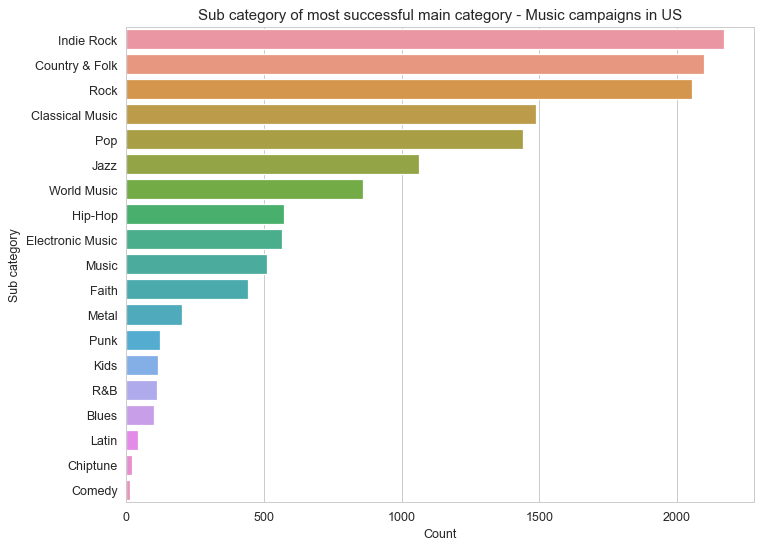

In [187]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(x=us_succ_ks_sub_cat_val.values,y=us_succ_ks_sub_cat_val.index)

plt.title('Sub category of most successful main category - Music campaigns in US')
plt.xlabel('Count')
plt.ylabel('Sub category');

In [179]:
us_succ_ks_sub_cat =  us_succ_ks_main_cat[us_succ_ks_main_cat['sub_category'] =='Indie Rock']

In [188]:
us_succ_ks_sub_cat.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
84,1255868271,Be Part of NUDE POP's Debut EP!,USD,music,Indie Rock,2012-11-30,2012-12-16,16.000,1200.000,Seattle,...,23,7,successful,11,12,Q4,Q4,1958.000,16,2012
107,906627517,Toddlers: Americana - Post Punk Debut Record,USD,music,Indie Rock,2012-08-20,2012-09-19,30.000,8000.000,Carrboro,...,20,7,successful,8,9,Q3,Q3,8290.000,30,2012
131,1950299792,John Vanderslice's DAGGER BEACH: The New Album,USD,music,Indie Rock,2013-02-19,2013-03-21,30.000,18500.000,San Francisco,...,24,7,successful,2,3,Q1,Q1,79335.360,30,2013
157,1580562166,New Soft Speaker Album - Turkish Mindbathers,USD,music,Indie Rock,2013-01-17,2013-02-28,42.000,2000.000,Chicago,...,17,7,successful,1,2,Q1,Q1,2540.000,42,2013
284,248115110,The Battle of Greenland,USD,music,Indie Rock,2016-09-01,2016-10-01,30.000,4000.000,Boston,...,24,4,successful,9,10,Q3,Q4,5624.000,30,2016


In [193]:
top_subcat_money_us_pledged = us_succ_ks_main_cat.groupby('sub_category').sum()[['goal_usd','usd_pledged'] ]#figs in million dollars
pd.set_option('display.float_format', lambda x: '%.3f' % x)

top_subcat_money_us_pledged

,goal_usd,usd_pledged
sub_category,,
Blues,834498.000,1009484.060
Chiptune,118666.000,517776.730
Classical Music,8632935.000,10344051.580
Comedy,104370.000,149372.580
Country & Folk,14511125.000,17651887.610
Electronic Music,2568601.320,3708513.920
Faith,3676943.000,4477478.180
Hip-Hop,2628939.710,3961287.200
Indie Rock,11748117.000,15192944.080


In [192]:
top_subcat_money_us_pledged = us_succ_ks_sub_cat.groupby('sub_category').sum()[['goal_usd','usd_pledged'] ]#figs in million dollars
pd.set_option('display.float_format', lambda x: '%.3f' % x)

top_subcat_money_us_pledged

,goal_usd,usd_pledged
sub_category,,
Indie Rock,11748117.000,15192944.080


# Lets look at the unsucessful campaigns in US

In [81]:
failed_ks = df[df['status'] == 'failed']

In [82]:
failed_ks_us = failed_ks[failed_ks['country'] == 'US']

In [203]:
failed_ks_us

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
117307,1145008426,Glass Christmas Trees & Glass Cross,USD,crafts,Glass,2016-06-04,2016-06-21,17.000,1000.000,Turtle Lake,...,22,6,failed,6,6,Q2,Q2,205.000,17,2016
117308,1608693208,The Complete Homilies of Blessed Oscar Romero:...,USD,publishing,Translations,2015-07-07,2015-08-16,40.000,4400.000,Miami,...,25,9,failed,7,8,Q3,Q3,800.000,40,2015
117309,66308869,Prodeus: The Future of Work & Learning,USD,technology,Web,2017-05-22,2017-06-21,30.000,50000.000,Brooklyn,...,16,7,failed,5,6,Q2,Q2,1484.000,30,2017
117311,459122294,The Tai Chi of Golf,USD,journalism,Print,2016-02-10,2016-03-11,30.000,50000.000,West Palm Beach,...,21,5,failed,2,3,Q1,Q1,52.000,30,2016
117312,1035652087,Kaspr,USD,technology,Web,2018-12-06,2019-02-04,60.000,1000.000,Jasper,...,21,1,failed,12,2,Q4,Q1,281.000,60,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,617071954,The Book Shop,USD,publishing,Art Books,2014-11-10,2014-12-10,30.000,9000.000,Somerville,...,17,3,failed,11,12,Q4,Q4,0.000,30,2014
192541,697542396,Loice Mae's Kitchen,USD,food,Drinks,2017-12-06,2018-01-09,34.000,30000.000,Burke,...,20,3,failed,12,1,Q4,Q1,150.000,34,2017
192545,109884142,PNW Juice Truck,USD,food,Drinks,2016-02-02,2016-03-03,30.000,30000.000,Seattle,...,13,3,failed,2,3,Q1,Q1,0.000,30,2016
192546,277520923,succulent christmas tree,USD,art,Conceptual Art,2014-08-06,2014-10-05,60.000,1200.000,Los Angeles,...,3,3,failed,8,10,Q3,Q4,143.000,60,2014


In [84]:
failed_goal = failed_ks_us['goal_usd'].mean()
failed_goal

79750.2752525233

In [85]:
failed_pledged = failed_ks_us['usd_pledged'].mean()
failed_pledged

1103.1722069685613

### It is clearly visible that in failed campaigns in US they were not able to reach their goal usd

In [86]:
failed_ks_us['launched year'].value_counts()

2015    14262
2016     9380
2014     9063
2017     8080
2018     5906
2013     1874
2012     1844
2011      879
2010      270
2019      134
2009       26
Name: launched year, dtype: int64

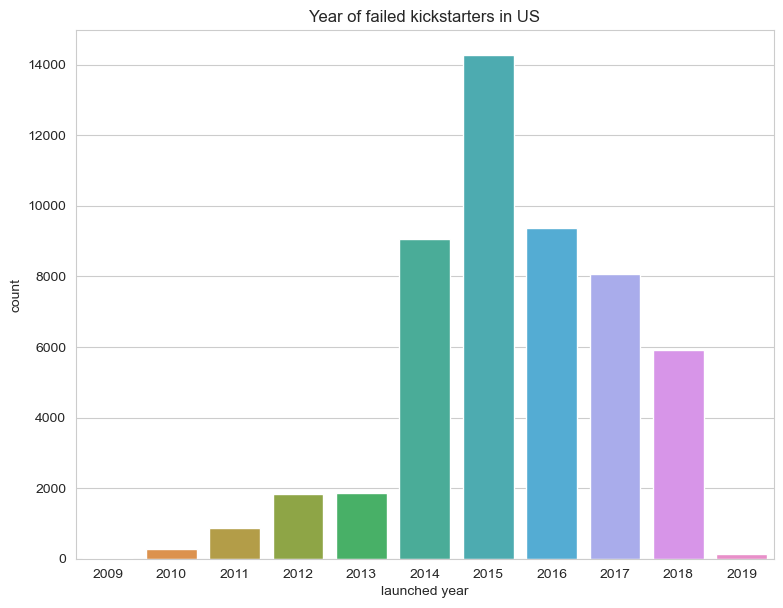

In [87]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=failed_ks_us,x='launched year')

plt.title('Year of failed kickstarters in US');

# The year 2015 saw most no of failed kickstarters in US.

In [88]:
fail_cat_us = failed_ks_us['main_category'].value_counts()
fail_cat_us

film & video    7169
food            7133
technology      6703
music           6283
art             5608
publishing      3648
games           2675
fashion         2320
crafts          2292
photography     2100
journalism      1743
design          1522
theater         1124
comics           953
dance            445
Name: main_category, dtype: int64

Text(0.5, 1.0, 'Count - Failed KS category US ')

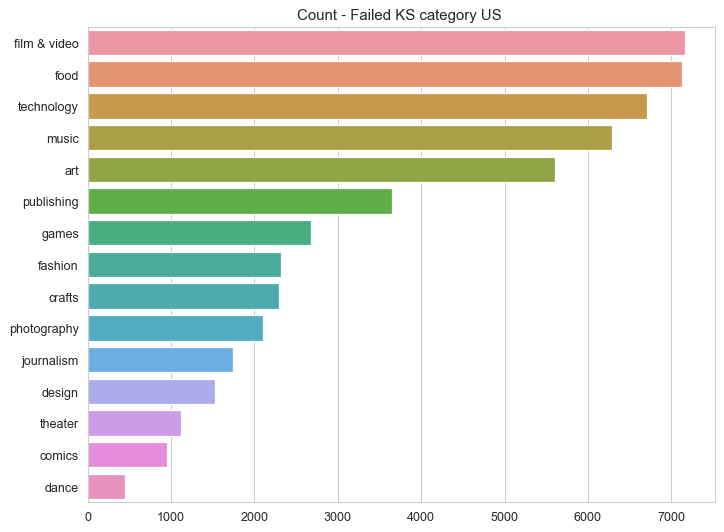

In [89]:
# Lets see the category of campaigns failed in us

plt.figure(figsize=(9,7),dpi=90)

sns.barplot(x=fail_cat_us.values,y=fail_cat_us.index)
plt.title('Count - Failed KS category US ')

### The most failed kickstart category in US are film&video & food

In [90]:
money_us_pledged_fail = failed_ks_us.groupby('main_category').sum()[['goal_usd','usd_pledged'] ]#figs in million dollars
pd.set_option('display.float_format', lambda x: '%.5f' % x)
money_us_pledged_fail

,goal_usd,usd_pledged
main_category,,
art,302306959.88000,3178457.71000
comics,12964772.00000,1271309.27000
crafts,33153871.00000,775224.86000
dance,6831916.00000,227837.45000
design,189878324.00000,2013227.07000
fashion,50354241.00000,1862956.87000
film & video,1717629857.10000,10546759.21000
food,387501056.00000,6994838.62000
games,223972049.00000,3479263.86000


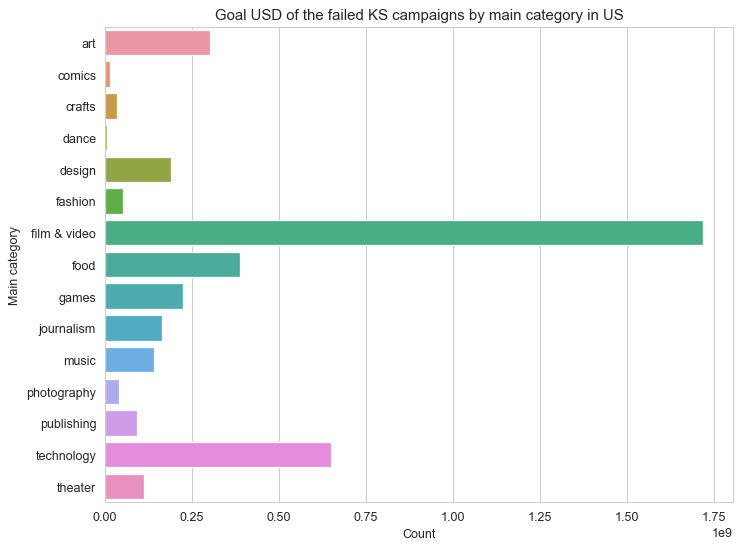

In [195]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(data=money_us_pledged_fail,y=money_us_pledged_fail.index,x='goal_usd')
plt.title('Goal USD of the failed KS campaigns by main category in US')
plt.xlabel('Count')
plt.ylabel('Main category');
#plt.xlim(0,10)

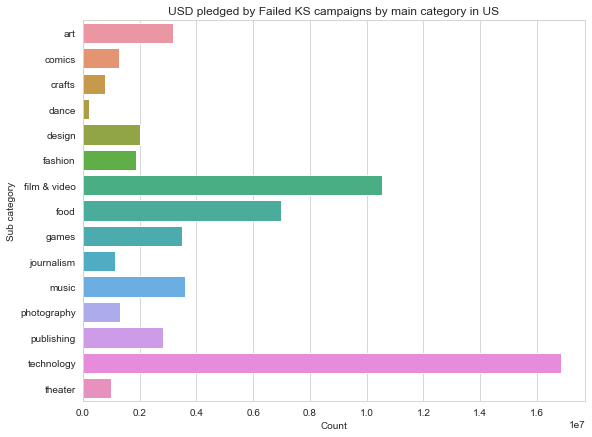

In [197]:
plt.figure(figsize=(9,7))

sns.barplot(data=money_us_pledged_fail,y=money_us_pledged_fail.index,x='usd_pledged')

plt.title('USD pledged by Failed KS campaigns by main category in US')
plt.xlabel('Count')
plt.ylabel('Sub category');

In [93]:
failed_ks_us.groupby('main_category').mean()[['duration','campaign span days']]

,duration,campaign span days
main_category,,
art,34.11591,34.16405
comics,34.05352,34.08395
crafts,32.18805,32.21161
dance,33.35955,33.43820
design,33.14915,33.20237
fashion,33.08233,33.11379
film & video,35.21370,35.24676
food,35.17034,35.20076
games,33.33084,33.36561


In [94]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
failed_ks_us.groupby(['main_category','start_Q']).sum()[['goal_usd','usd_pledged']]


goal_usd  usd_pledged
main_category start_Q                           
art           Q1       31896718.860   620540.990
              Q2       25965899.910   904573.650
              Q3      219611852.010   946991.320
              Q4       24832489.100   706351.750
comics        Q1        3616592.000   219130.470
              Q2        3769932.000   429401.900
              Q3        2548744.000   300365.250
              Q4        3029504.000   322411.650
crafts        Q1       16246076.000   241615.540
              Q2        4827134.000   157390.780
              Q3        6586719.000   169460.210
              Q4        5493942.000   206758.330
dance         Q1        1459409.000    42532.680
              Q2        1715513.000    82222.990
              Q3        1275391.000    55910.410
              Q4        2381603.000    47171.370
design        Q1       31338004.000   522396.550
              Q2       96371872.000   645607.440
              Q3       32263676.000   386240.750
              Q4       29904772.000   458982.330
fashion       Q1        8087878.000   308926.760
              Q2       12588491.000   518622.490
              Q3       19282532.000   492379.320
              Q4       10395340.000   543028.300
film & video  Q1      445609472.000  2084170.170
              Q2      185950793.000  2621064.960
              Q3      633646798.100  3016006.780
              Q4      452422794.000  2825517.300
food          Q1      101505303.000  1496061.740
              Q2      118264402.000  1912821.700
              Q3      107445958.000  1885045.750
              Q4       60285393.000  1700909.430
games         Q1       17563075.000   688015.550
              Q2      130352242.000   845549.650
              Q3       51797337.000   843758.960
              Q4       24259395.000  1101939.700
journalism    Q1        8742018.000   386952.330
              Q2       13311550.000   243187.290
              Q3       32149785.000   293786.170
              Q4      110360717.000   214323.910
music         Q1       42972214.990   922860.240
              Q2       41103798.220   939012.900
              Q3       27619074.330   807255.110
              Q4       29038574.330   938869.850
photography   Q1       12006925.000   258970.210
              Q2       15270156.000   365794.320
              Q3        8445188.000   388551.770
              Q4        5164351.000   280532.720
publishing    Q1       22146091.000   626045.840
              Q2       16114679.270   818700.220
              Q3       16108861.390   610586.100
              Q4       38120598.000   776190.530
technology    Q1      144993619.000  3437600.730
              Q2      176869912.000  4787877.290
              Q3      224197666.000  4128890.500
              Q4      103388034.000  4500999.580
theater       Q1       19950375.000   172648.760
              Q2       14740427.000   248603.800
              Q3       60500277.000   216805.090
              Q4       16616798.000   338940.020

In [95]:
#These campaingns were also up online and working for most the span

In [96]:
failed_ks_us['start_month'].value_counts() #lets see in which months are the most failed projects launched

7     5534
8     4813
5     4535
10    4391
6     4350
9     4281
3     4221
11    4212
4     4191
1     4067
2     4032
12    3091
Name: start_month, dtype: int64

In [97]:
#the distribution looks like somewhat even

In [98]:
failed_ks_us['start_Q'].value_counts() #lets see in which quarter most failed projects were found

Q3    14628
Q2    13076
Q1    12320
Q4    11694
Name: start_Q, dtype: int64

In [99]:
failed_ks_us['city'].value_counts().sort_values(ascending=False)[0:5]  #Top 5 cities of failed ks

Los Angeles      2675
New York         1838
Chicago          1151
Atlanta          1035
San Francisco     726
Name: city, dtype: int64

# Lets analyze the data of rest of the world - countries other than us

In [100]:
rest_of_world = df[df['country'] != 'US']

In [101]:
rest_of_world['country']

1         GB
7         DE
10        CA
19        GB
23        GB
          ..
192537    GB
192540    GB
192542    DE
192543    NO
192544    NO
Name: country, Length: 46195, dtype: object

In [102]:
rest_of_world.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.000,3871.000,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.510,30,2018
7,1452339343,The biggest NASA fashion collection in the gal...,EUR,design,Graphic Design,2018-07-17,2018-08-16,30.000,1133.690,Berlin,...,17,8,successful,7,8,Q3,Q3,1168.380,30,2018
10,390870,Those White Horses - Issue #1,CAD,comics,Comic Books,2017-09-05,2017-10-05,30.000,1135.630,Montreal,...,23,6,successful,9,10,Q3,Q4,1388.850,30,2017
19,125916035,Sounds from the Void - Cthulhu horror music co...,GBP,games,Tabletop Games,2018-11-13,2018-11-27,14.000,645.170,Derby,...,23,9,successful,11,11,Q4,Q4,923.210,14,2018
23,351350196,Maelstrom Rome RPG,GBP,games,Tabletop Games,2018-12-10,2019-01-09,30.000,1290.330,North Yorkshire,...,7,3,successful,12,1,Q4,Q1,2799.330,30,2018


In countries other than USA More than half of the projects have succeded in raising the funds for their projects


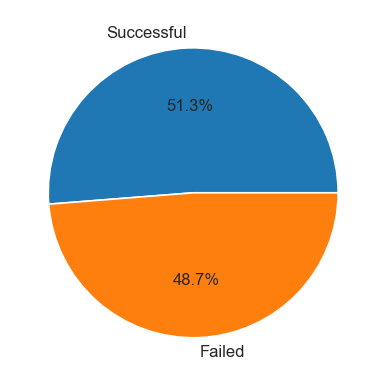

In [103]:
#success rate of campaigns in countries other than US

result=rest_of_world['status'].value_counts()
fig = plt.figure(dpi=120)
label = 'Successful','Failed'
sizes = result.values

plt.pie(sizes,labels = label,autopct='%1.1f%%');

print('In countries other than USA More than half of the projects have succeded in raising the funds for their projects')

Text(0.5, 1.0, 'Successful and failed campaigns by category for non US countries')

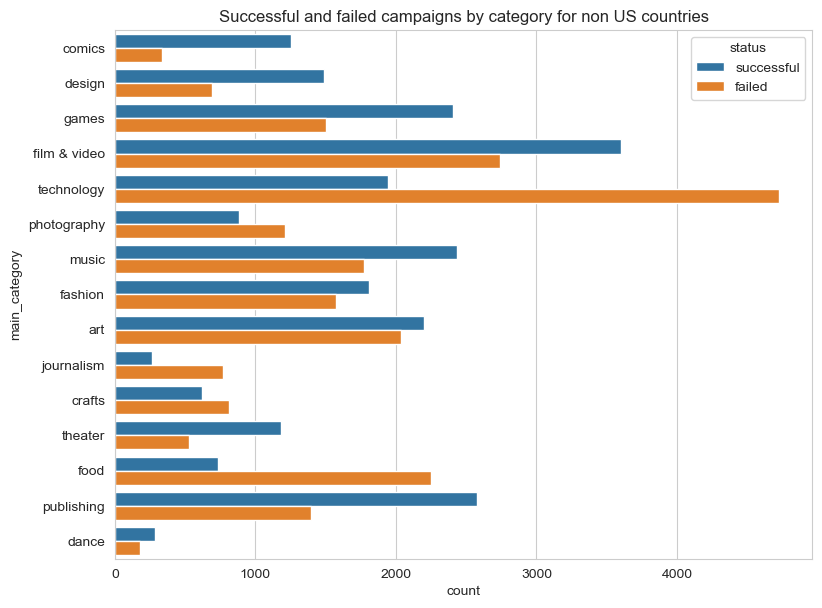

In [104]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = rest_of_world, y='main_category',hue='status')

plt.title('Successful and failed campaigns by category for non US countries')

## From the above plot we can see that for the rest of the countries the most successfull ks campaign category was film&video

## The most failed ks campaigns category - technology

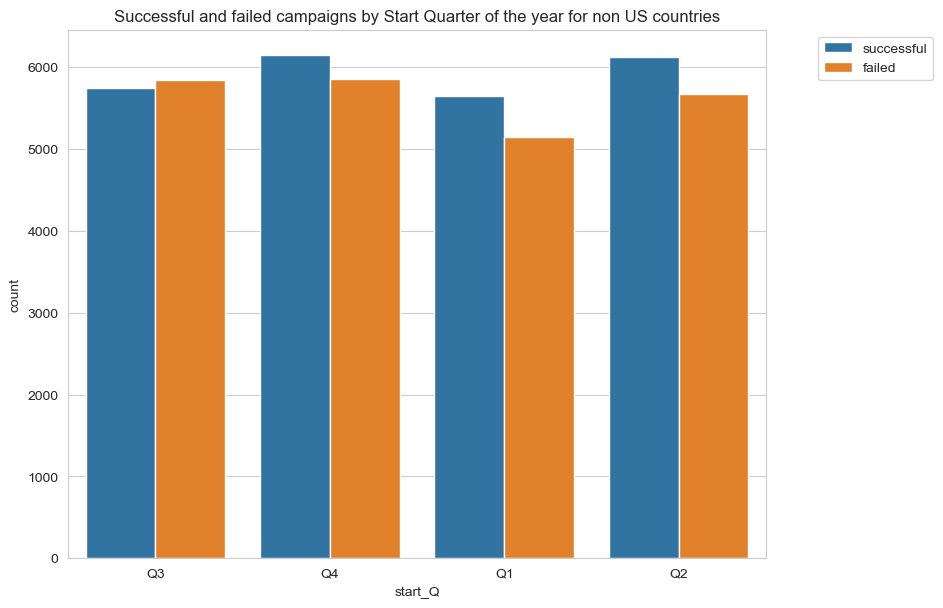

In [150]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = rest_of_world, x='start_Q',hue='status')

plt.title('Successful and failed campaigns by Start Quarter of the year for non US countries')

plt.legend(bbox_to_anchor=(1.25,1))

#### As we can see from above plot we can see the the success of a campaign does not depend on which quarter the were launched in

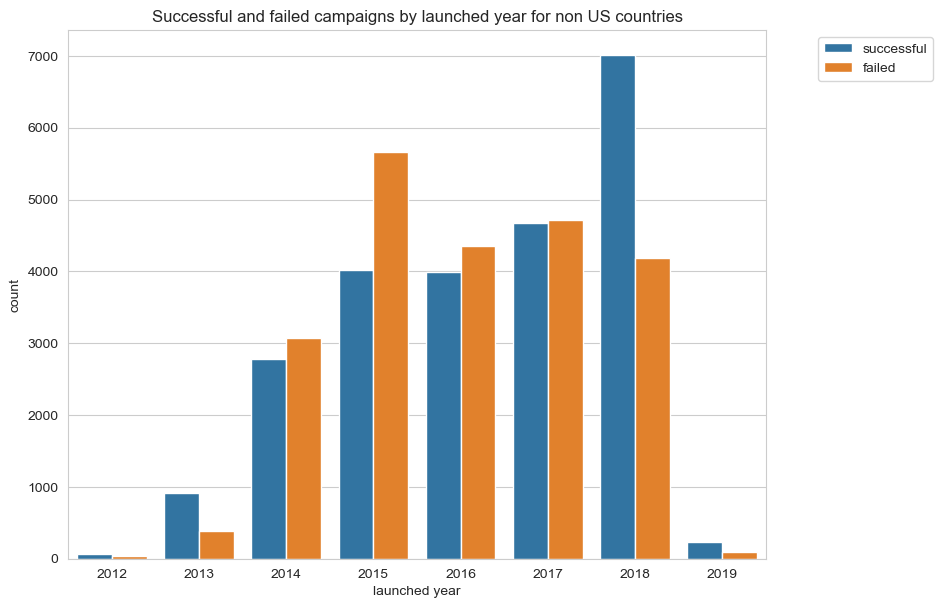

In [144]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = rest_of_world, x='launched year',hue='status')

plt.title('Successful and failed campaigns by launched year for non US countries')

plt.legend(bbox_to_anchor=(1.25,1));

## In Non US countries 2018 has been the most successful year for KS campaigns and the year 2015 has seen the highest number of failed KS campaigns

## Lets See the data about successfull campaigns in countries other than US

In [106]:
rest_success= rest_of_world[rest_of_world['status'] == 'successful']

In [107]:
rest_success

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06,2018-09-05,30.000,3871.000,Shepperton,...,24,8,successful,8,9,Q3,Q3,3914.510,30,2018
7,1452339343,The biggest NASA fashion collection in the gal...,EUR,design,Graphic Design,2018-07-17,2018-08-16,30.000,1133.690,Berlin,...,17,8,successful,7,8,Q3,Q3,1168.380,30,2018
10,390870,Those White Horses - Issue #1,CAD,comics,Comic Books,2017-09-05,2017-10-05,30.000,1135.630,Montreal,...,23,6,successful,9,10,Q3,Q4,1388.850,30,2017
19,125916035,Sounds from the Void - Cthulhu horror music co...,GBP,games,Tabletop Games,2018-11-13,2018-11-27,14.000,645.170,Derby,...,23,9,successful,11,11,Q4,Q4,923.210,14,2018
23,351350196,Maelstrom Rome RPG,GBP,games,Tabletop Games,2018-12-10,2019-01-09,30.000,1290.330,North Yorkshire,...,7,3,successful,12,1,Q4,Q1,2799.330,30,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117274,1267963868,8 Faces: Collected,GBP,publishing,Art Books,2016-09-15,2016-10-15,30.000,51613.300,Bristol,...,24,3,successful,9,10,Q3,Q4,69516.600,30,2016
117276,1717100410,The Man Who Writes the Dreams - a story for my...,NZD,publishing,Fiction,2017-08-10,2017-09-11,32.000,1706.950,Wellington,...,25,12,successful,8,9,Q3,Q3,8431.590,32,2017
117278,1790140828,Hourglass Music Video,EUR,dance,Dance,2018-05-22,2018-06-12,21.000,3384.060,San Diego,...,17,3,successful,5,6,Q2,Q2,3635.320,21,2018
117281,527672537,Picture Postcards from Japan,EUR,art,Conceptual Art,2017-11-16,2017-12-17,31.000,566.840,Kyoto-shi,...,12,4,successful,11,12,Q4,Q4,1816.080,31,2017


In [108]:
rest_su_cat = rest_success['main_category'].value_counts()
rest_su_cat

film & video    3601
publishing      2579
music           2432
games           2407
art             2198
technology      1943
fashion         1805
design          1490
comics          1250
theater         1183
photography      885
food             736
crafts           622
dance            282
journalism       263
Name: main_category, dtype: int64

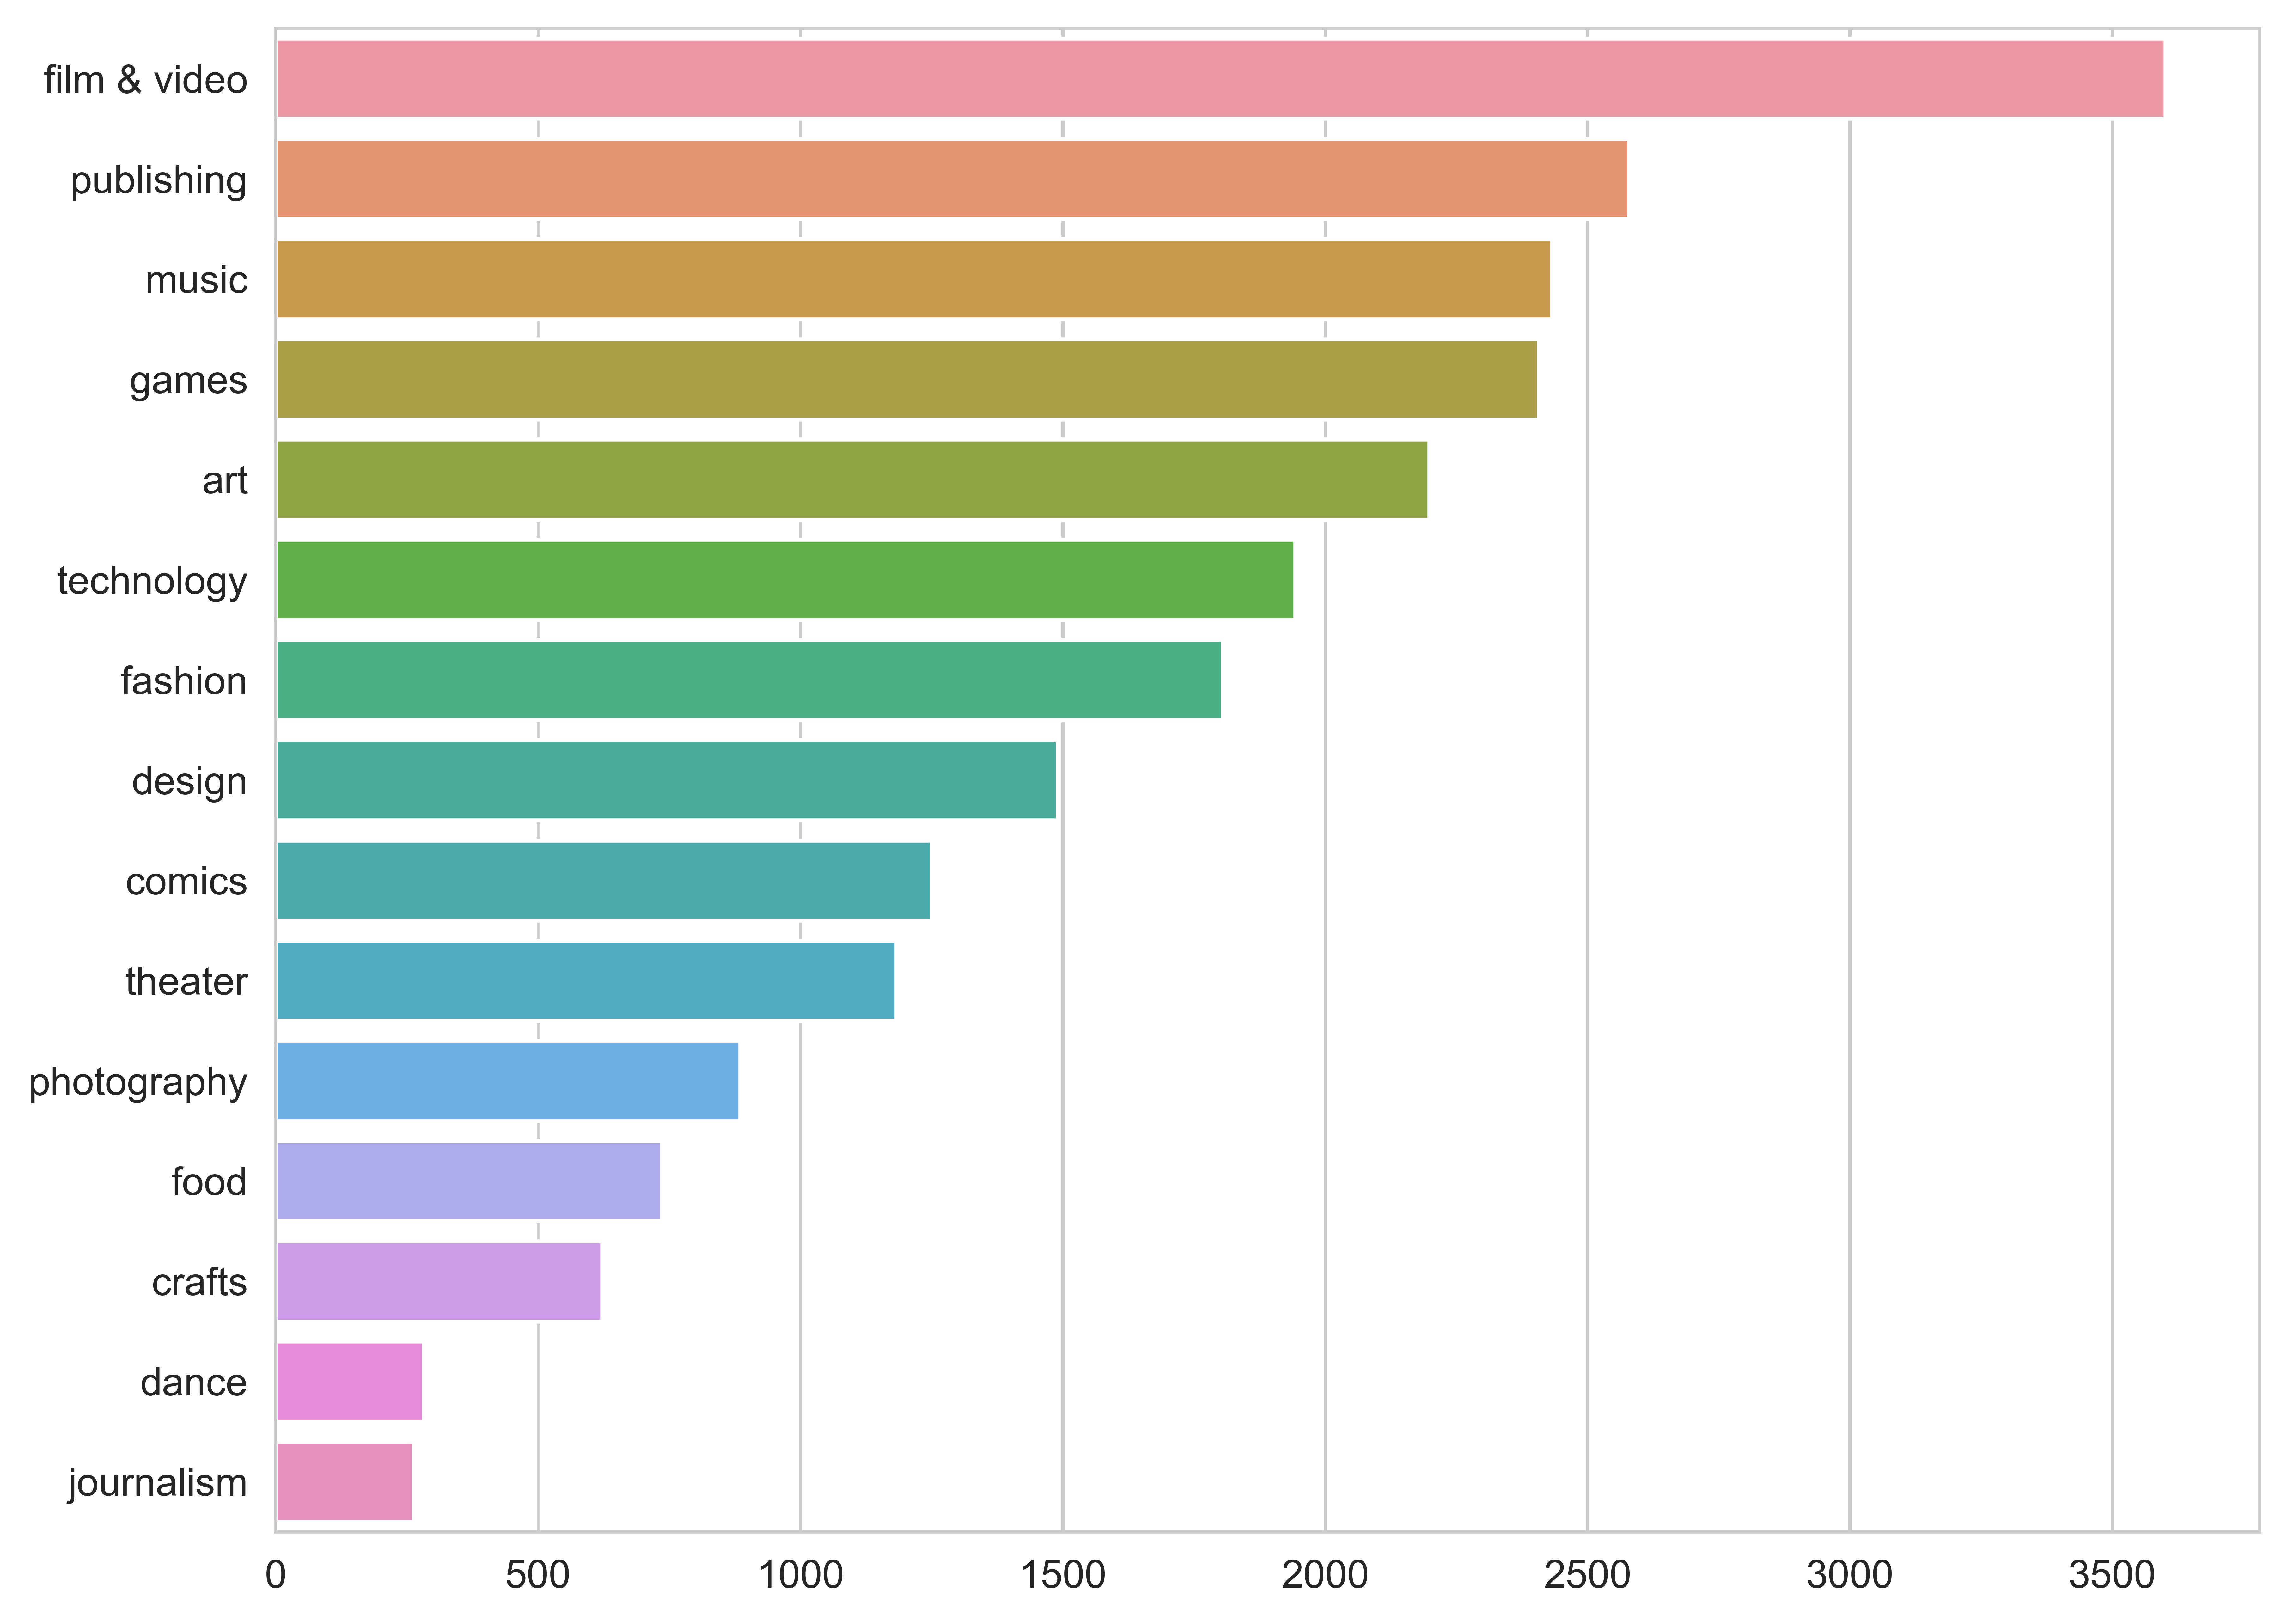

In [109]:
plt.figure(figsize=(9,7),dpi=900)

sns.barplot(x=rest_su_cat.values,y=rest_su_cat.index);

### As we saw earlier film&video is the most successful KS campaign in countries other than US

In [110]:
rest_su_year = rest_success['launched year'].value_counts()
rest_su_year

2018    7006
2017    4669
2015    4013
2016    3986
2014    2785
2013     916
2019     236
2012      65
Name: launched year, dtype: int64

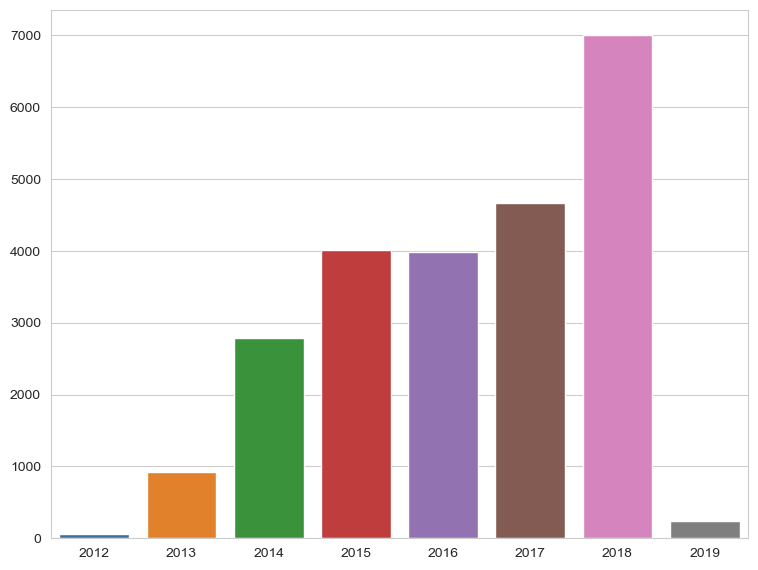

In [111]:
plt.figure(figsize=(9,7),dpi=100)

sns.barplot(y=rest_su_year.values,x=rest_su_year.index);

### Turns out in rest of the countries other than US the most successful projects were launched in the year 2018

In [146]:
nonus_money_us_pledged = rest_success.groupby('main_category').sum()[['goal_usd','usd_pledged'] ]#figs in million dollars
pd.set_option('display.float_format', lambda x: '%.3f' % x)
nonus_money_us_pledged

,goal_usd,usd_pledged
main_category,,
art,6781802.800,14826347.930
comics,4574752.660,9481147.310
crafts,1850195.660,3110073.190
dance,907972.380,1119431.530
design,13909293.480,54675219.270
fashion,13233556.840,29952382.800
film & video,24566568.140,33931858.780
food,8207986.720,12914002.410
games,27210174.460,88534468.090


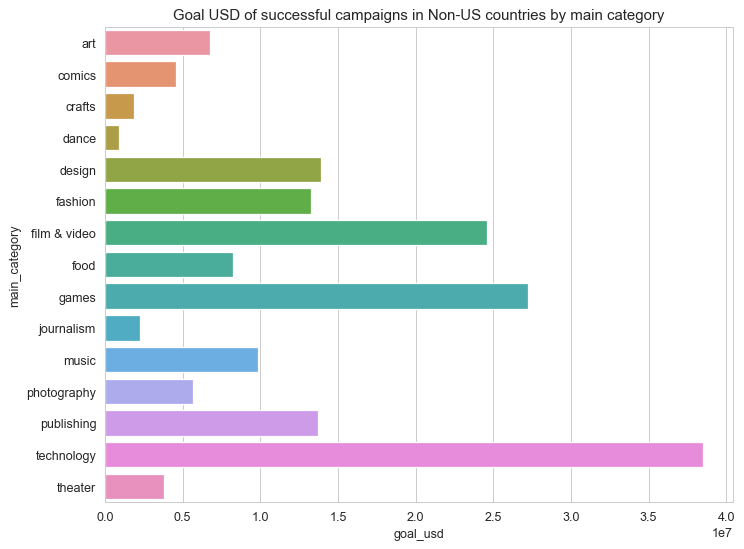

In [147]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(data = nonus_money_us_pledged,y=nonus_money_us_pledged.index,x=nonus_money_us_pledged.goal_usd)

plt.title('Goal USD of successful campaigns in Non-US countries by main category');

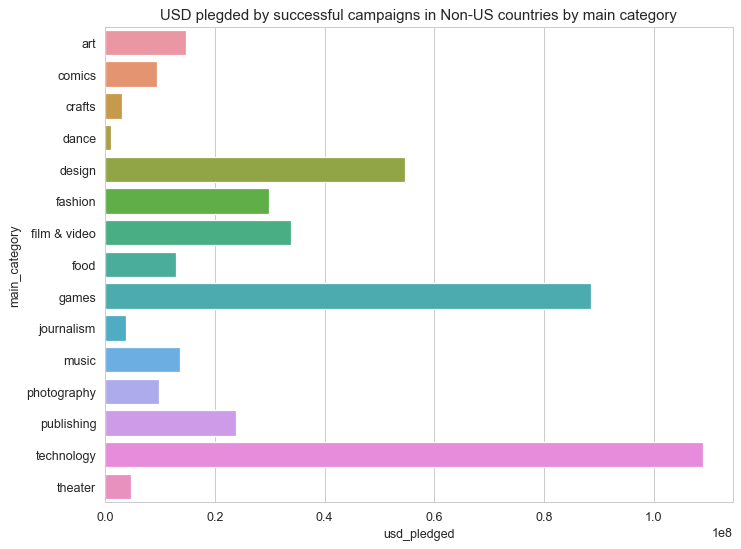

In [148]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(data = nonus_money_us_pledged,y=nonus_money_us_pledged.index,x=nonus_money_us_pledged.usd_pledged)

plt.title('USD plegded by successful campaigns in Non-US countries by main category');

### The thing to be noted is that though technology categroy shows us that it racked in more funding than the top successful category which was film&video, it should be noted that the success parameter here does not depend on the money pledged but it does depend on how many campaigns were successful in meeting their goal funding, so in that way film&video category remains the most successful category

# Now let us see the top sub category of the most sucessful main category of campaign in countries other than US

In [115]:
non_us_top_maincat = rest_success[rest_success['main_category'] == 'film & video']

In [116]:
non_us_top_maincat

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,campaign span days,launched year
24,1055921554,Girl A,GBP,film & video,Drama,2016-12-31,2017-01-31,31.000,903.230,Leicestershire,...,26,2,successful,12,1,Q4,Q1,1867.340,31,2016
277,1047353701,Paulinchens Jakobsweg - 880 km in Feuerwehr-Ei...,EUR,film & video,Documentary,2015-07-08,2015-08-23,46.000,6802.130,Augsburg,...,16,7,successful,7,8,Q3,Q3,6942.040,46,2015
288,85687915,Guardians Of The Flame,GBP,film & video,Documentary,2018-05-11,2018-06-10,30.000,2838.730,Rostrevor,...,20,4,successful,5,6,Q2,Q2,3236.760,30,2018
324,1461357954,The Power of Sound,GBP,film & video,Documentary,2015-01-20,2015-02-19,30.000,5161.330,London,...,23,4,successful,1,2,Q1,Q1,6088.170,30,2015
327,2111126530,Strangeness in Space,GBP,film & video,Science Fiction,2015-03-24,2015-04-26,34.000,19354.990,London,...,24,3,successful,3,4,Q1,Q2,28873.570,33,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116920,2083476973,BUNDEN,SEK,film & video,Drama,2017-05-31,2017-06-30,30.000,16222.980,Lycke,...,19,1,successful,5,6,Q2,Q2,17799.710,30,2017
116928,1492029412,The Blue Puppet,GBP,film & video,Fantasy,2016-03-21,2016-04-25,35.000,1548.400,Bournemouth,...,12,3,successful,3,4,Q1,Q2,1832.530,35,2016
116993,1292793612,Teen Dad,NZD,film & video,Drama,2016-11-12,2016-12-12,30.000,205.510,Christchurch,...,23,2,successful,11,12,Q4,Q4,216.500,30,2016
117147,339792913,Make Ceri Walk,GBP,film & video,Experimental,2014-07-25,2014-08-24,30.000,1.290,Wales,...,14,3,successful,7,8,Q3,Q3,17.040,30,2014


In [117]:
top_subcat_nonus = non_us_top_maincat['sub_category'].value_counts()
top_subcat_nonus

Shorts             916
Documentary        673
Drama              421
Comedy             256
Webseries          190
Narrative Film     185
Animation          165
Horror             139
Science Fiction    116
Thrillers           92
Film & Video        91
Music Videos        90
Experimental        60
Fantasy             49
Festivals           42
Action              35
Television          29
Romance             19
Movie Theaters      17
Family              16
Name: sub_category, dtype: int64

# Shorts - maybe shorts film category is the top sub category of the most successful maincategory kikstarter campaigns of the non US countries

In [118]:
top_subcat_nonus_curr = non_us_top_maincat.groupby('sub_category').sum()[['goal_usd','usd_pledged'] ]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
top_subcat_nonus_curr

,goal_usd,usd_pledged
sub_category,,
Action,236846.280,298816.090
Animation,1891186.000,3751055.510
Comedy,1777095.510,2442502.740
Documentary,8104587.740,10428644.500
Drama,1983507.500,2783489.390
Experimental,168517.260,191223.540
Family,152917.260,187772.130
Fantasy,231253.770,282603.930
Festivals,147359.190,180809.460


### We can see that though shorts has most successful no of campaigns documentary ks campaings has pledged more money. But as we already saw above success depends on achieving goal funding.

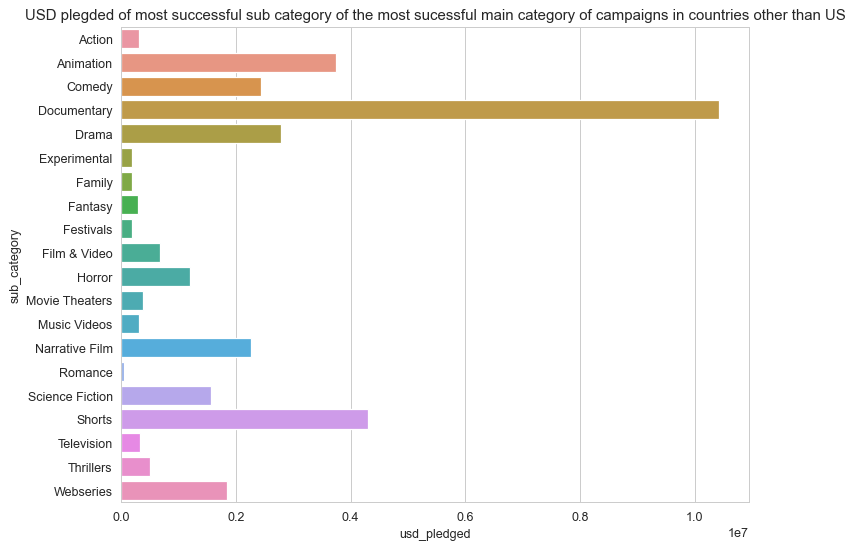

In [119]:
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(data = top_subcat_nonus_curr,y=top_subcat_nonus_curr.index,x=top_subcat_nonus_curr.usd_pledged)

plt.title('USD plegded of most successful sub category of the most sucessful main category of campaigns in countries other than US');

# Now let us see anlayze the failed Kickstarter campaigns of non US countries

In [120]:
rest_failed = rest_of_world[rest_of_world['status'] == 'failed']

In [140]:
rest_failed_year = rest_failed['launched year'].value_counts()
rest_failed_year

2015    5667
2017    4716
2016    4349
2018    4189
2014    3078
2013     388
2019      90
2012      42
Name: launched year, dtype: int64

In [ ]:
# It can be seen that out of all the campaigns launched in Non US countries 

Text(0, 0.5, 'Count')

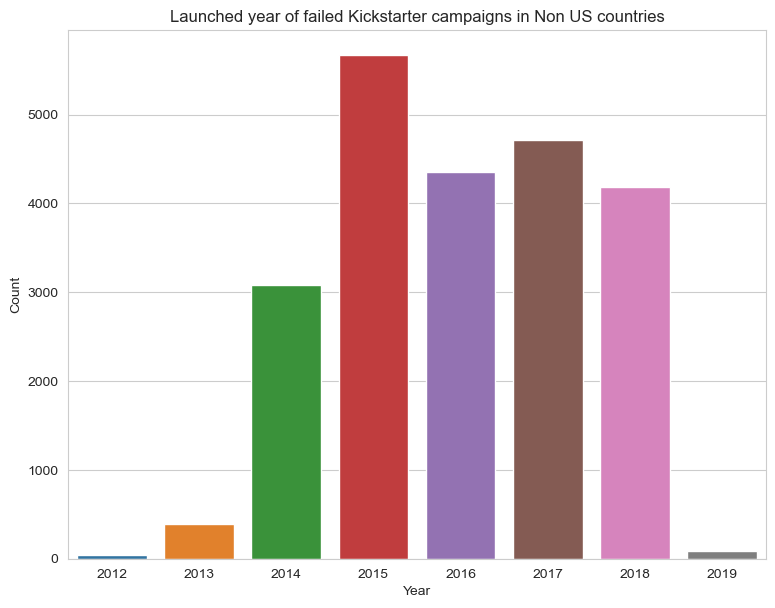

In [139]:
plt.figure(figsize=(9,7),dpi=100)

sns.barplot(x=rest_failed_year.index,y=rest_failed_year.values)
plt.title('Launched year of failed Kickstarter campaigns in Non US countries')
plt.xlabel('Year')
plt.ylabel('Count')

### 2015 is the year most KS campaigns failed in Non US countries.

In [133]:
rest_fail_cat = rest_failed['main_category'].value_counts()
rest_fail_cat

technology      4728
film & video    2739
food            2249
art             2036
music           1770
fashion         1570
games           1504
publishing      1392
photography     1213
crafts           814
journalism       767
design           691
theater          530
comics           336
dance            180
Name: main_category, dtype: int64

In [204]:
rest_failed['goal_usd'].mean()

79927.38506283925

In [205]:
rest_failed['usd_pledged'].mean()

1084.0639446689454

### Technology seems to be the top most failed category of KS campaigns in non US countries

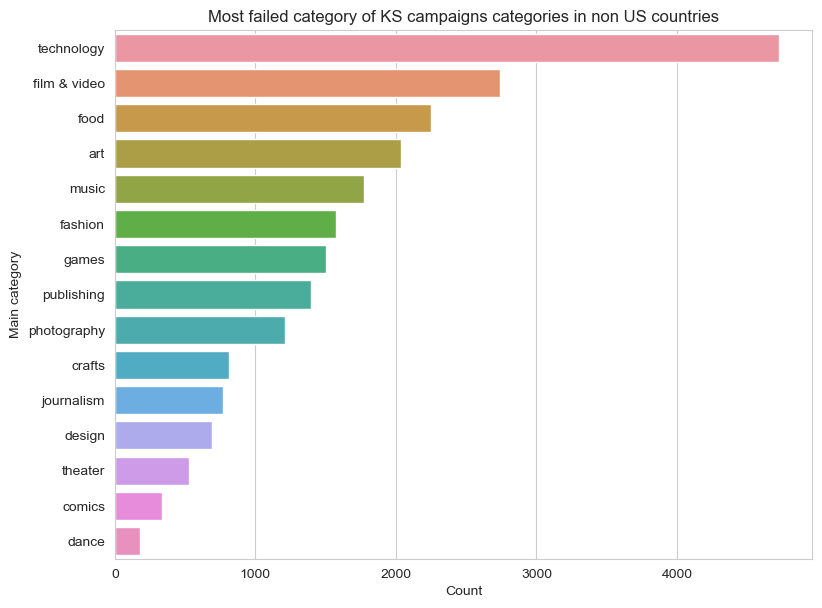

In [122]:
plt.figure(figsize=(9,7),dpi=100)

sns.barplot(y=rest_fail_cat.index,x=rest_fail_cat.values)
plt.xlabel('Count')
plt.ylabel('Main category')
plt.title('Most failed category of KS campaigns categories in non US countries');

In [123]:
top_rest_fail_cat = rest_failed.groupby('main_category').sum()[['goal_usd','usd_pledged'] ]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
top_rest_fail_cat

,goal_usd,usd_pledged
main_category,,
art,240935385.900,1084397.340
comics,3335868.540,364793.450
crafts,7178749.300,414503.700
dance,2564024.600,62280.150
design,72573992.730,908251.460
fashion,43771932.060,1659962.730
film & video,626776133.660,3487723.480
food,210696411.360,1613015.740
games,47398838.350,1294036.650


### Now let us see the top sub category of the top main category of failed campaigns in countries other than US


In [124]:
top_sub_fail_cat = rest_failed[rest_failed['main_category'] == 'technology']

In [125]:
top_failed_subcat_nonus = top_sub_fail_cat['sub_category'].value_counts()
top_failed_subcat_nonus

Web                  983
Apps                 840
Software             796
Gadgets              461
Hardware             427
Wearables            245
DIY Electronics      187
3D Printing          159
Sound                155
Robots               111
Flight               104
Fabrication Tools     76
Space Exploration     74
Camera Equipment      58
Makerspaces           52
Name: sub_category, dtype: int64

### Web - is the sub category with most failed campaigns in the most failed main category campaigns in non US countries

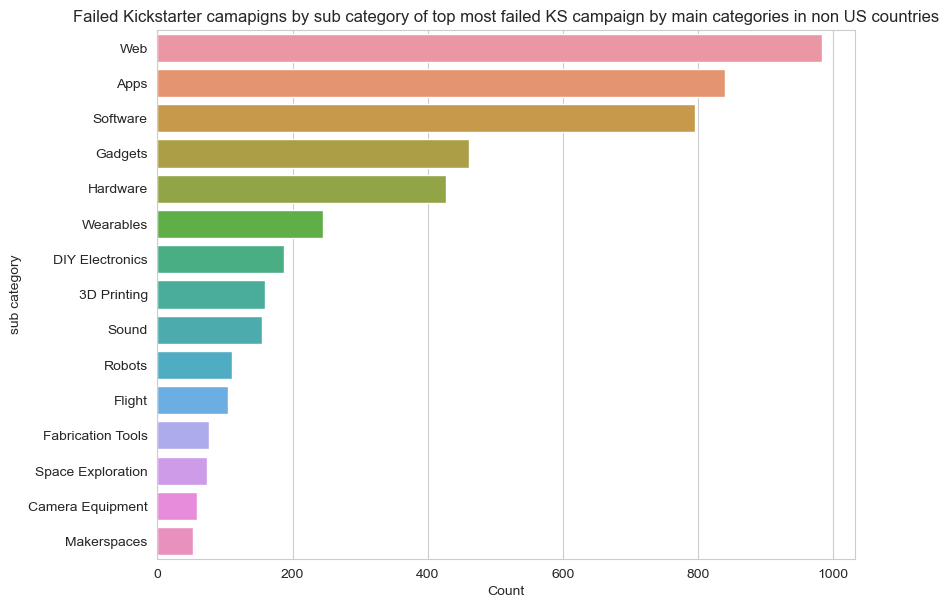

In [126]:
plt.figure(figsize=(9,7),dpi=100)

sns.barplot(y=top_failed_subcat_nonus.index,x=top_failed_subcat_nonus.values)
plt.ylabel('sub category')
plt.xlabel('Count')
plt.title('Failed Kickstarter camapigns by sub category of top most failed KS campaign by main categories in non US countries');

In [127]:
top_sub_fail_cat_curr = top_sub_fail_cat.groupby('sub_category').sum()[['goal_usd','usd_pledged'] ]
top_sub_fail_cat_curr

,goal_usd,usd_pledged
sub_category,,
3D Printing,7286866.820,661746.210
Apps,45316512.740,456476.550
Camera Equipment,1814525.370,380919.610
DIY Electronics,5116943.770,522185.640
Fabrication Tools,6232564.010,201125.960
Flight,24703377.910,266720.460
Gadgets,24786337.820,1681241.410
Hardware,33201775.550,1899631.180
Makerspaces,14435022.130,86489.880


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168467 entries, 0 to 192547
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  168467 non-null  int64         
 1   name                168467 non-null  object        
 2   currency            168467 non-null  object        
 3   main_category       168467 non-null  object        
 4   sub_category        168467 non-null  object        
 5   launched_at         168467 non-null  datetime64[ns]
 6   deadline            168467 non-null  datetime64[ns]
 7   duration            168467 non-null  float64       
 8   goal_usd            168467 non-null  float64       
 9   city                168467 non-null  object        
 10  state               168467 non-null  object        
 11  country             168467 non-null  object        
 12  blurb_length        168467 non-null  int64         
 13  name_length         168467 no